In [17]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import math

In [3]:
import IPython
from IPython.display import Audio
import ipywidgets as widgets
from ipywidgets import interact,interactive,fixed,interact_manual


In [62]:
basic_freq = 440

figsize=(10,5)
linewidth=2.5
matplotlib.rcParams.update({'font.size': 16})

# Constants
fs = 44100
time_sig = np.linspace(0, 2*np.pi, fs)
samples = np.arange(2*fs)
NB_RAND_TONES = 3 # numbers of random frequencies we want
# the amplitude is set to 0.5 by default, because audio normalize must be between -1 and 1
REF_SIG = sine(0.5, basic_freq, 0, time_sig)


freq = basic_freq

In [42]:
# Generate standard reference tone
def sine(A, w, phi, n):
    return A * np.sin(w*n - phi)

def generate_random_tone():
    rand_freq = np.random.uniform(20,15000)
    # the amplitude is set to 0.5 by default, because audio normalize must be between -1 and 1
    rand_sig = sine(0.5, rand_freq, 0, time_sig) 
    return (rand_sig, rand_freq)

In [73]:
# Array that stores random frequencies
rand_arr = [generate_random_tone()[1] for i in range(0, NB_RAND_TONES)]
# array that stores tuples (frequency, volume)
volume_arr = [(None, None) for i in range(0, NB_RAND_TONES)]

def change_volume(A, N):
    r_freq = rand_arr[N]
    print(A)
    vol_to_db = 20*math.log(A/100)
    print(vol_to_db)
    volume_arr[N] = (r_freq, vol_to_db)
    rand_sig = sine(A/100, r_freq, 0, time_sig)
    display(Audio(rand_sig, rate=fs, normalize=False))

Audio(REF_SIG, rate=fs, normalize=False)

In [44]:
p0 = 20 * 10e-6 # smallest detectable pressure
#p = math.sqrt()

In [74]:


for x in range(0, NB_RAND_TONES):   
    print("Slider : " + str(x+1) + " Freq : " + str(rand_arr[x]))
    interact(change_volume, A=widgets.IntSlider(min=0, max=100, step=1, value=50), N=fixed(x))

Audio(REF_SIG, rate=fs, normalize=False)

Slider : 1 Freq : 7544.052236456785


interactive(children=(IntSlider(value=50, description='A'), Output()), _dom_classes=('widget-interact',))

Slider : 2 Freq : 582.3856445864297


interactive(children=(IntSlider(value=50, description='A'), Output()), _dom_classes=('widget-interact',))

Slider : 3 Freq : 11365.957497911919


interactive(children=(IntSlider(value=50, description='A'), Output()), _dom_classes=('widget-interact',))

[(582.3856445864297, -13.862943611198906), (7544.052236456785, -50.51457288616511), (11365.957497911919, 0.0)]


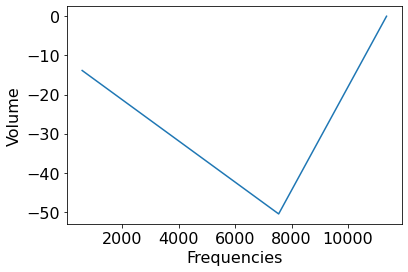

In [75]:
def final_plot():
    # Sort the data by frequencies
    volume_arr.sort(key=lambda tup: tup[0])
    print(volume_arr)
    plt.plot(*zip(*volume_arr))
    plt.xlabel("Frequencies")
    plt.ylabel("Volume")
#    plt.legend(loc='upper right') 
    plt.show()
    return

final_plot()